<a href="https://colab.research.google.com/github/wlgml014/bdas_proj-4/blob/main/tsne/featureselection%EC%A0%84T_SNE%EC%84%B1%EC%9D%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# importing pandas
import numpy as np
import pandas as pd
from pandas.core.internals.blocks import F

In [ ]:
import numpy as np
import pandas as pd
from datetime import datetime

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
#from sklearn.metrics import plot_confusion_matrix
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn import neighbors, datasets
#from sklearn.inspection import DecisionBoundaryDisplay

import sklearn.metrics
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt

from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [ ]:
#col = [0,1,2,3,4,5,6,7,8,9,10,11]
#col = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]  ##아

Dos= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/preprocessing_data/DoS_dataset_pre.csv', index_col=0)
Fuzzy=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/preprocessing_data/Fuzzy_dataset_pre.csv', index_col=0)
Rpm=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/preprocessing_data/RPM_dataset_pre.csv', index_col=0)
#,usecols = col

In [ ]:
Dataset = pd.concat((Dos, Fuzzy, Rpm))

In [ ]:
def sampling_func(data, n_sample):
    np.random.seed(10) #실행할 때마다 동일한 샘플을 추출하기 위해 random seed 고정
    N = len(data)
    sample = data.take(np.random.permutation(N)[:n_sample])
    return sample

SampledDataset = Dataset.groupby('Label', group_keys=False).apply(sampling_func, n_sample=3000)

([<matplotlib.patches.Wedge at 0x7f05f8b859f0>,
 [Text(0.7778174593052024, 0.7778174593052023, '0'),
  Text(-0.7778174593052023, 0.7778174593052024, '1'),
  Text(-0.7778174593052025, -0.7778174593052023, '2'),
  Text(0.7778174593052022, -0.7778174593052025, '3')])

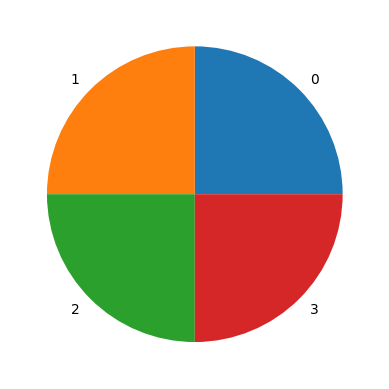

In [ ]:
import matplotlib.pyplot as plt
s = SampledDataset['Label'].value_counts()
plt.pie(s,labels = s.index)

In [ ]:
X = SampledDataset.drop(['Label'], axis=1)
y = SampledDataset['Label']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.2, random_state = 1)

In [ ]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

# **TSNE**

In [ ]:
from sklearn.manifold import TSNE

train_df = SampledDataset.drop(['Label'], axis = 1)

tsne_np = TSNE(n_components = 2).fit_transform(train_df)

tsne_df = pd.DataFrame(tsne_np, columns = ['component 0', 'component 1'])

In [ ]:
SampledDataset['Label']

SampledDataset['Label'].info()
type(SampledDataset['Label'])
SampledDataset['Label'].values

<class 'pandas.core.series.Series'>
Int64Index: 12000 entries, 4273807 to 1386865
Series name: Label
Non-Null Count  Dtype
--------------  -----
12000 non-null  int64
dtypes: int64(1)
memory usage: 187.5 KB


array([0, 0, 0, ..., 3, 3, 3])

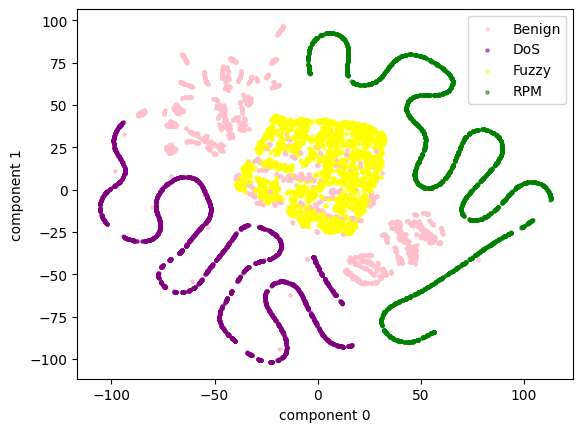

In [ ]:
import matplotlib.pyplot as plt

# class target 정보 불러오기
tsne_df['Label'] = SampledDataset['Label'].values

# target 별 분리
tsne_df_0 = tsne_df[tsne_df['Label'] == 0]
tsne_df_1 = tsne_df[tsne_df['Label'] == 1]
tsne_df_2 = tsne_df[tsne_df['Label'] == 2]
tsne_df_3 = tsne_df[tsne_df['Label'] == 3]

# target 별 시각화
plt.scatter(tsne_df_0['component 0'], tsne_df_0['component 1'], color = 'pink', label = 'Benign',alpha=0.5, s=5)
plt.scatter(tsne_df_1['component 0'], tsne_df_1['component 1'], color = 'purple', label = 'DoS', alpha=0.5, s=5)
plt.scatter(tsne_df_2['component 0'], tsne_df_2['component 1'], color = 'yellow', label = 'Fuzzy', alpha=0.5, s=5)
plt.scatter(tsne_df_3['component 0'], tsne_df_3['component 1'], color = 'green', label = 'RPM', alpha=0.5, s=5)

plt.xlabel('component 0')
plt.ylabel('component 1')
plt.legend()
plt.show()

In [ ]:
from sklearn.manifold import TSNE

train_df = SampledDataset.drop(['Label'], axis = 1)

tsne_np = TSNE(n_components = 3).fit_transform(train_df)

tsne_df = pd.DataFrame(tsne_np, columns = ['component 0', 'component 1', 'component 2'])

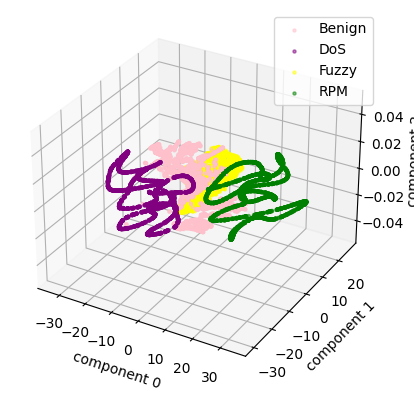

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D # 3차원 시각화 가능
# 3차원 그래프 세팅
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

# class target 정보 불러오기
tsne_df['Label'] = SampledDataset['Label'].values


# target 별 분리
tsne_df_0 = tsne_df[tsne_df['Label'] == 0]
tsne_df_1 = tsne_df[tsne_df['Label'] == 1]
tsne_df_2 = tsne_df[tsne_df['Label'] == 2]
tsne_df_3 = tsne_df[tsne_df['Label'] == 3]

# target 별 시각화
plt.scatter(tsne_df_0['component 0'], tsne_df_0['component 1'], color = 'pink', label = 'Benign',alpha=0.5, s=5)
plt.scatter(tsne_df_1['component 0'], tsne_df_1['component 1'], color = 'purple', label = 'DoS', alpha=0.5, s=5)
plt.scatter(tsne_df_2['component 0'], tsne_df_2['component 1'], color = 'yellow', label = 'Fuzzy', alpha=0.5, s=5)
plt.scatter(tsne_df_3['component 0'], tsne_df_3['component 1'], color = 'green', label = 'RPM', alpha=0.5, s=5)

ax.set_xlabel('component 0')
ax.set_ylabel('component 1')
ax.set_zlabel('component 2')
ax.legend()
plt.show()